In [1]:
%reload_ext autoreload
%autoreload 2

import os
from pathlib import Path
import multiprocessing

import jax
import numpyro

from hbmep.config import Config
from hbmep.model import Model
from hbmep.model.utils import Site as site

from hbmep_paper.model import HierarchicalBayesian, MaximumLikelihood
from hbmep_paper.utils import simulate, run_experiment

PLATFORM = "cpu"
jax.config.update("jax_platforms", PLATFORM)
numpyro.set_platform(PLATFORM)

cpu_count = multiprocessing.cpu_count() - 2
numpyro.set_host_device_count(cpu_count)
numpyro.enable_x64()


In [2]:
root_path = Path(os.getcwd()).parent.parent.parent.absolute()
toml_path = os.path.join(root_path, "configs/experiments.toml")

config = Config(toml_path=toml_path)
config.BUILD_DIR = "/home/vishu/repos/hbmep-paper/reports/mle/"

2023-08-02 09:34:37,163 - hbmep.config - INFO - Verifying configuration ...
2023-08-02 09:34:37,164 - hbmep.config - INFO - Success!


In [3]:
simulator = HierarchicalBayesian(config=config)

simulation_params = {
    "n_subject": 2,
    "n_feature0": 3,
    "n_repeats": 2
}
df, posterior_samples_true = simulate(model=simulator, **simulation_params)

2023-08-02 09:34:40,566 - hbmep.model.baseline - INFO - Initialized model with hierarchical_bayesian link
2023-08-02 09:34:40,566 - hbmep_paper.utils.utils - INFO - Simulating data ...


2023-08-02 09:34:42,698 - hbmep.utils.utils - INFO - func:predict took: 2.13 sec
2023-08-02 09:34:42,698 - hbmep.utils.utils - INFO - func:simulate took: 2.13 sec


In [4]:
model = MaximumLikelihood(config=config)

df, encoder_dict = model.load(df=df)

df[model.response] = posterior_samples_true[site.obs][0, ...]

2023-08-02 09:34:49,955 - hbmep.model.baseline - INFO - Initialized model with maximum_likelihood link
2023-08-02 09:34:49,955 - hbmep.dataset.core - INFO - Artefacts will be stored here - /home/vishu/repos/hbmep-paper/reports/mle/
2023-08-02 09:34:49,955 - hbmep.dataset.core - INFO - Copied config to /home/vishu/repos/hbmep-paper/reports/mle/
2023-08-02 09:34:49,955 - hbmep.dataset.core - INFO - Processing data ...
2023-08-02 09:34:49,956 - hbmep.utils.utils - INFO - func:load took: 0.00 sec


In [5]:
model.plot(df=df, encoder_dict=encoder_dict)

2023-08-02 09:34:52,297 - hbmep.dataset.core - INFO - Plotting dataset ...
2023-08-02 09:34:53,351 - hbmep.dataset.core - INFO - Saved to /home/vishu/repos/hbmep-paper/reports/mle/dataset.pdf
2023-08-02 09:34:53,351 - hbmep.utils.utils - INFO - func:plot took: 1.06 sec


In [6]:
mcmc, posterior_samples = model.run_inference(df=df)

2023-08-02 09:35:22,065 - hbmep_paper.model.mle - INFO - Running inference with maximum_likelihood ...


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

2023-08-02 09:45:59,428 - hbmep.utils.utils - INFO - func:run_inference took: 10 min and 37.36 sec


In [13]:
mcmc.print_summary(prob=.95)


                mean       std    median      2.5%     97.5%     n_eff     r_hat
  H[0,0,0]    112.72     79.32     97.83      4.30    241.61      4.83      1.39
  H[0,1,0]      1.40      0.37      1.21      1.10      2.25      6.18      1.48
  H[1,0,0]     57.84     49.20     41.17      0.30    156.82     75.57      1.07
  H[1,1,0]     58.65     61.10     42.98      0.01    177.44      5.23      1.31
  H[2,0,0]      5.28      1.17      4.73      3.95      7.59      2.68      2.04
  H[2,1,0]     45.11     45.23     32.64      0.15    137.81     16.48      1.11
  L[0,0,0]      0.01      0.00      0.01      0.01      0.01      7.12      1.25
  L[0,1,0]      0.01      0.00      0.01      0.01      0.01     21.07      1.13
  L[1,0,0]      0.07      0.00      0.07      0.06      0.07     30.08      1.11
  L[1,1,0]      0.01      0.00      0.01      0.01      0.01     27.69      1.12
  L[2,0,0]      0.00      0.00      0.00      0.00      0.00    190.83      1.02
  L[2,1,0]      0.00      0

In [11]:
model.render_recruitment_curves(df=df, encoder_dict=encoder_dict, posterior_samples=posterior_samples)


2023-08-02 09:49:09,277 - hbmep.model.baseline - INFO - Generating predictions ...
2023-08-02 09:49:14,397 - hbmep.utils.utils - INFO - func:predict took: 5.12 sec
2023-08-02 09:49:14,422 - hbmep.model.baseline - INFO - Rendering recruitment curves ...
2023-08-02 09:49:16,106 - hbmep.model.baseline - INFO - Saved to /home/vishu/repos/hbmep-paper/reports/mle/recruitment_curves.pdf
2023-08-02 09:49:16,107 - hbmep.utils.utils - INFO - func:render_recruitment_curves took: 6.83 sec


In [12]:
model.render_predictive_check(df=df, encoder_dict=encoder_dict, posterior_samples=posterior_samples)


2023-08-02 09:49:16,146 - hbmep.model.baseline - INFO - Generating predictions ...
2023-08-02 09:49:21,272 - hbmep.utils.utils - INFO - func:predict took: 5.12 sec
2023-08-02 09:49:21,312 - hbmep.model.baseline - INFO - Rendering Posterior Predictive Check ...
2023-08-02 09:49:24,535 - hbmep.model.baseline - INFO - Saved to /home/vishu/repos/hbmep-paper/reports/mle/posterior_predictive_check.pdf
2023-08-02 09:49:24,536 - hbmep.utils.utils - INFO - func:render_predictive_check took: 8.39 sec


In [22]:
posterior_samples_2 = mcmc.get_samples(group_by_chain=True)
a = np.array(posterior_samples_2["a"])
H = np.array(posterior_samples_2["H"])

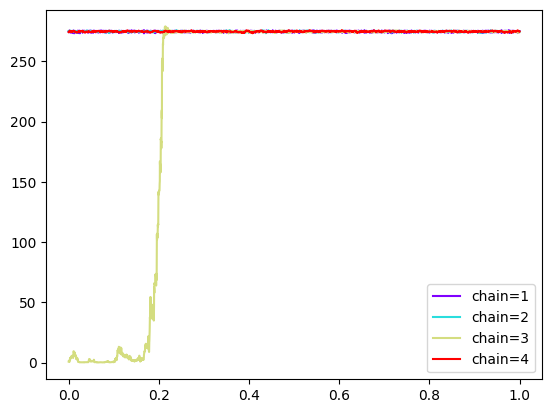

In [27]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


p, q, r = 1, 1, 0

color = iter(plt.cm.rainbow(np.linspace(0, 1, 4)))
x = np.linspace(0, 1, 6000)

for i in range(4):
    c = next(color)
    sns.lineplot(x=x, y=a[i, :, p, q, r], color=c, label=f"chain={i+1}")